In [8]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

# задані точки
x = np.array([i * 0.01 for i in range(0, 11)])  # задаємо x генератором списків
y = np.array([20.1946, 19.6133, 18.9425, 18.1746, 17.3010, 16.3123, 15.1984, 13.9484, 12.5508, 10.9937, 9.2647])

# перша інтерполяційна формула
def first_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i + 1, j - 1] - f[i, j - 1]) / (x[i + j] - x[i])

    ans = 0
    for j in range(n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
    return ans

# друга інтерполяційна формула
def second_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i + 1, j - 1] - f[i, j - 1]) / (x[i + j] - x[i])

    ans = f[0, 0]
    for j in range(1, n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
    return ans

# обчислюємо значення функції в точках x = 0.1 та x = 0.9
x1 = 0.1
x2 = 0.9
y1 = first_interpolation(x, y, x1)
y2 = second_interpolation(x, y, x2)

print(f"f({x1}) = {y1}")
print(f"f({x2}) = {y2}")


f(0.1) = 9.264699999999998
f(0.9) = 11642371380.37571


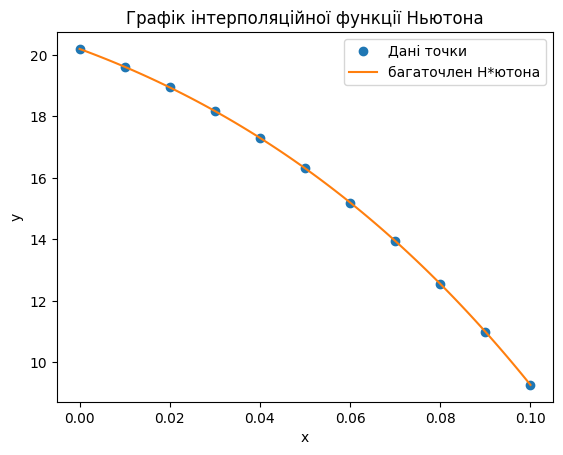

In [9]:
# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
 yy[i] = second_interpolation(x, y, xx[i])
plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label='багаточлен Н*ютона')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
